In [1]:
import os
import numpy as np
import pandas as pd

file_path = './test_results.xlsx'

df_raw = pd.read_excel(file_path, engine='openpyxl')
df_raw = df_raw.loc[:, ~df_raw.columns.str.contains("Unnamed:")]



In [7]:
pivot_index = list(df_raw.columns[0:18]) # accuracy 전까지
pivot_index.remove('drift_model')
pivot_index.remove('n_rep')
pivot_index.remove('pruning')
pivot_index.remove('Gmax')
pivot_index.remove('Gmin')
pivot_index.remove('retrain')
pivot_index

['model',
 'dataset',
 'device',
 'IOparameter',
 'GDC',
 'mapping_scaling_omega',
 'noise_model',
 'pgm_noise_scale',
 'read_noise_scale',
 'drift_scale',
 'G_ratio',
 'inf_time']

In [48]:
df = df_raw.copy()

In [49]:
df = df[df['G_ratio']==25]
# df = df[df['drift_model'] == 0.01]
df = df[df['pgm_noise_scale'] == 1]
df = df[df['GDC'] == 'off']
df = df[df['IOparameter'] == 'non-ideal']

In [34]:
df['p_drift'] = df['pruning'].astype(str) + '_' + df['drift_model'].astype(str)

In [50]:
df_mlp = df[df['model'] == 'MLP']
df_res = df[df['model'] == 'Resnet18']

In [77]:
df_mlp = df_mlp[df_mlp['retrain'] == 'X']

In [30]:
# df_mlp['pruning'].unique()
df_res['p_drift'].unique()

array(['0.5_0.01', '-_0.01', '0.3_0.01', '0.4_0.01', '0.6_0.01',
       '0.7_0.01'], dtype=object)

In [78]:
df_mlp_log = df_mlp[df_mlp['drift_model'] == 'log']
df_mlp_001 = df_mlp[df_mlp['drift_model'] == 0.01]

df_res_log = df_res[df_res['drift_model'] == 'log']
df_res_001 = df_res[df_res['drift_model'] == 0.01]

In [80]:
df_pivot_log = df_mlp_log.pivot_table(index=pivot_index, columns='pruning', values='accuracy', aggfunc='mean')
df_pivot_log.reset_index(inplace=True) # index to columns

In [81]:
df_pivot_log

pruning,model,dataset,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,G_ratio,inf_time,0.3,0.4,0.5,0.6,0.7,-
0,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1,95.889,94.520996,93.931999,93.182999,93.977997,94.646
1,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10,95.714005,93.679001,93.399994,93.314011,93.480003,94.607002
2,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,100,95.091003,93.894005,92.82299,92.666,93.028992,93.891998
3,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1000,93.894005,92.297997,91.600006,90.589005,91.462997,92.503998
4,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,3600,93.251999,90.673996,90.348,88.800003,91.166992,91.702495
5,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10000,92.467003,89.640999,89.798996,88.224998,90.202003,90.334003
6,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,86400,90.586998,87.344994,87.167007,84.850998,87.205002,87.478001
7,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10000000,84.922005,79.480003,80.693001,76.643997,81.030998,80.2295
8,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,100000000,80.792,74.638992,76.678001,72.145004,76.630997,75.49149
9,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1000000000,76.849007,69.914993,70.481003,66.940002,72.294998,69.859005


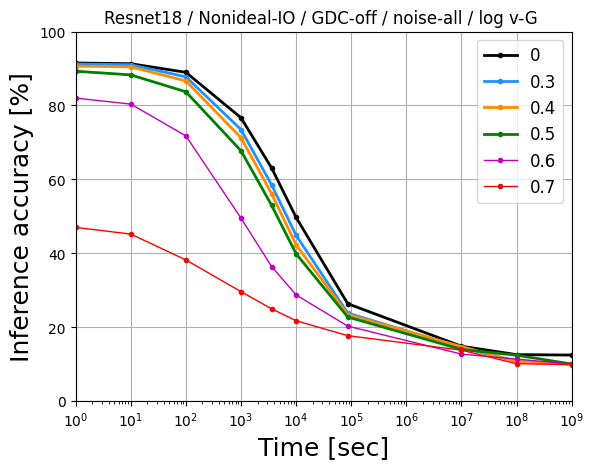

In [76]:
import matplotlib.pyplot as plt
x = df_pivot_log['inf_time']

plt.grid(True)

plt.plot(x,df_pivot_log['-'], marker='.', label = '0', linewidth=2, color='k')
plt.plot(x,df_pivot_log[0.3], marker='.', label = '0.3', linewidth=2, color='dodgerblue')
plt.plot(x,df_pivot_log[0.4], marker='.', label = '0.4', linewidth=2, color='darkorange')
plt.plot(x,df_pivot_log[0.5], marker='.', label = '0.5', linewidth=2, color='g')
plt.plot(x,df_pivot_log[0.6], marker='.', label = '0.6', linewidth=1, color='m')
plt.plot(x,df_pivot_log[0.7], marker='.', label = '0.7', linewidth=1, color='r')


plt.title("Resnet18 / Nonideal-IO / GDC-off / noise-all / log v-G ")
plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

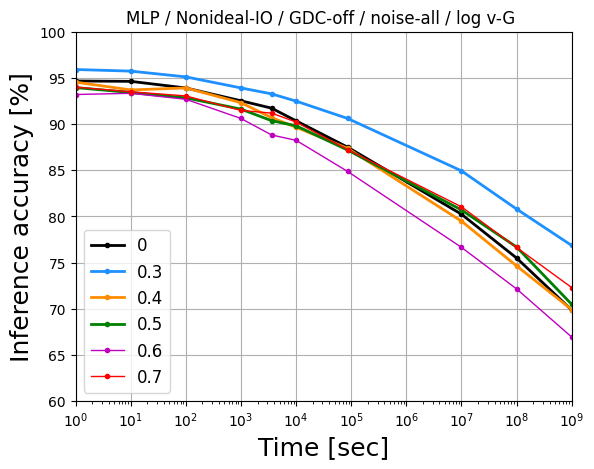

In [87]:
import matplotlib.pyplot as plt

x = df_pivot_log['inf_time']

plt.grid(True)

plt.plot(x,df_pivot_log['-'], marker='.', label = '0', linewidth=2, color='k')
plt.plot(x,df_pivot_log[0.3], marker='.', label = '0.3', linewidth=2, color='dodgerblue')
plt.plot(x,df_pivot_log[0.4], marker='.', label = '0.4', linewidth=2, color='darkorange')
plt.plot(x,df_pivot_log[0.5], marker='.', label = '0.5', linewidth=2, color='g')
plt.plot(x,df_pivot_log[0.6], marker='.', label = '0.6', linewidth=1, color='m')
plt.plot(x,df_pivot_log[0.7], marker='.', label = '0.7', linewidth=1, color='r')

plt.title("MLP / Nonideal-IO / GDC-off / noise-all / log v-G ")
plt.legend(fontsize=12, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(60,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

In [30]:
df_pivot_001 = df_mlp_001.pivot_table(index=pivot_index, columns='pruning', values='accuracy', aggfunc='mean')
df_pivot_001.reset_index(inplace=True) # index to columns

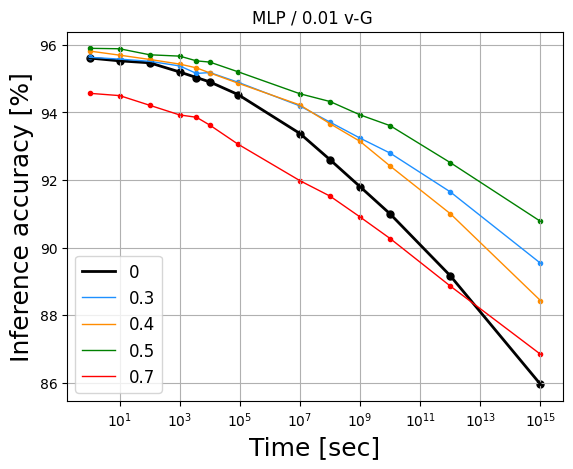

In [33]:
x = df_pivot_001['inf_time']

plt.grid(True)

plt.plot(x,df_pivot_001['-'], label = '0', linewidth=2, color='k')
plt.scatter(x, df_pivot_001['-'], marker='.', s=100, color='k')

plt.plot(x,df_pivot_001[0.3], label = '0.3', linewidth=1, color='dodgerblue')
plt.scatter(x, df_pivot_001[0.3], marker='.',  color='dodgerblue')

plt.plot(x,df_pivot_001[0.4], label = '0.4', linewidth=1, color='darkorange')
plt.scatter(x, df_pivot_001[0.4], marker='.',  color='darkorange')

plt.plot(x,df_pivot_001[0.5], label = '0.5', linewidth=1, color='g')
plt.scatter(x, df_pivot_001[0.5], marker='.',  color='g')

# plt.plot(x,df_pivot_001[0.6], label = '0.6', linewidth=1, color='m')
# plt.scatter(x, df_pivot_001[0.6], marker='.',  color='m')

plt.plot(x,df_pivot_001[0.7], label = '0.7', linewidth=1, color='r')
plt.scatter(x, df_pivot_001[0.7], marker='.', color='r')

plt.title("MLP / 0.01 v-G ")
plt.legend(fontsize=12, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

# plt.ylim(80,100)
# plt.xlim(1,100000000)
plt.xscale('log')
plt.show()

In [76]:
df_pivot_001

pruning,model,dataset,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,G_ratio,inf_time,0.3,0.4,0.5,0.6,0.7,-
0,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1,95.850998,94.554001,93.953995,93.257004,94.141991,94.441002
1,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10,95.723991,93.786003,93.629997,93.241005,93.524994,94.749008
2,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,100,95.514008,94.550003,93.440994,93.097000,93.491005,94.548996
3,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1000,95.216003,94.134995,93.074997,91.967003,92.593994,94.076004
4,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,3600,95.227997,93.632996,92.812996,90.885002,93.126999,94.616989
5,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10000,94.926003,93.284012,93.065002,91.227005,92.948997,93.959000
6,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,86400,94.729004,93.229004,92.471992,89.887001,91.841003,93.296005
7,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,10000000,93.934998,91.577995,91.691002,87.784996,90.878006,92.988007
8,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,100000000,93.181999,90.972992,91.300003,86.792999,90.084000,92.684998
9,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,25,1000000000,92.933998,90.070000,89.921005,85.938004,89.942001,91.685997


In [15]:
df_r_pivot_log = df_res_log.pivot_table(index=pivot_index, columns='pruning', values='accuracy', aggfunc='mean')
df_r_pivot_log.reset_index(inplace=True) # index to columns

In [16]:
df_r_pivot_log

pruning,model,dataset,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,G_ratio,inf_time,0.3,0.4,0.5,0.6,0.7,-
0,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,1,91.169998,90.319992,88.435997,78.540001,43.596001,91.206009
1,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,10,91.176994,90.304001,88.349998,78.692001,44.080002,91.037994
2,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,100,90.531998,89.919006,87.345993,76.589005,41.461002,90.397003
3,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,1000,89.672997,89.081009,85.945999,70.386002,38.795002,89.660995
4,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,3600,88.875000,88.438004,83.641998,68.434006,35.569000,88.445000
5,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,10000,88.158997,87.603004,82.593994,66.233002,34.314003,87.223000
6,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,86400,85.066002,84.995003,77.659996,60.178001,31.133999,84.921997
7,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,10000000,71.496002,71.885002,62.193005,42.015003,24.432001,71.643997
8,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,100000000,61.650002,61.365002,51.043999,31.457001,21.273001,62.568001
9,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,1000000000,46.900002,46.946003,34.621002,24.528999,17.766001,49.650997


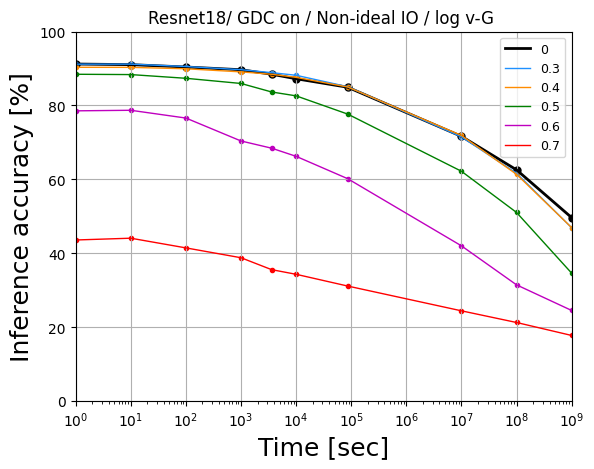

In [24]:
import matplotlib.pyplot as plt

x = df_r_pivot_log['inf_time']

plt.grid(True)

plt.plot(x,df_r_pivot_log['-'], label = '0', linewidth=2, color='k')
plt.scatter(x, df_r_pivot_log['-'], marker='.', s=100, color='k')

plt.plot(x,df_r_pivot_log[0.3], label = '0.3', linewidth=1, color='dodgerblue')
plt.scatter(x, df_r_pivot_log[0.3], marker='.',  color='dodgerblue')

plt.plot(x,df_r_pivot_log[0.4], label = '0.4', linewidth=1, color='darkorange')
plt.scatter(x, df_r_pivot_log[0.4], marker='.',  color='darkorange')

plt.plot(x,df_r_pivot_log[0.5], label = '0.5', linewidth=1, color='g')
plt.scatter(x, df_r_pivot_log[0.5], marker='.',  color='g')

plt.plot(x,df_r_pivot_log[0.6], label = '0.6', linewidth=1, color='m')
plt.scatter(x, df_r_pivot_log[0.6], marker='.',  color='m')

plt.plot(x,df_r_pivot_log[0.7], label = '0.7', linewidth=1, color='r')
plt.scatter(x, df_r_pivot_log[0.7], marker='.', color='r')

plt.title("Resnet18/ GDC on / Non-ideal IO / log v-G ")
plt.legend(fontsize=9, loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

In [41]:
df_pivot_001 = df_res_001.pivot_table(index=pivot_index, columns='pruning', values='accuracy', aggfunc='mean')
df_pivot_001.reset_index(inplace=True) # index to columns

In [42]:
df_pivot_001

pruning,model,dataset,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,G_ratio,inf_time,0.3,0.4,0.5,0.6,0.7,-
0,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,1,90.452988,89.797997,87.396996,80.606003,41.108997,91.300003
1,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,10,90.111,89.537003,87.133011,80.500999,41.792004,91.571999
2,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,100,90.202988,89.456001,87.005997,79.675003,41.601997,91.417007
3,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,1000,90.102997,89.534996,87.078995,79.123001,39.818001,91.112
4,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,3600,89.709,89.184006,86.453003,78.740005,39.167,91.150002
5,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,10000,89.505997,88.875992,86.330002,77.398994,38.487999,90.733002
6,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,86400,88.849998,88.233002,85.237007,75.612,38.327,90.419006
7,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,10000000,87.697998,86.853004,83.615005,73.298996,37.460003,89.168991
8,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,100000000,87.150009,86.112,82.764999,71.012001,37.162003,88.347
9,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,1,1,1,25,1000000000,86.440994,85.481995,82.162003,67.669998,35.805,87.586998


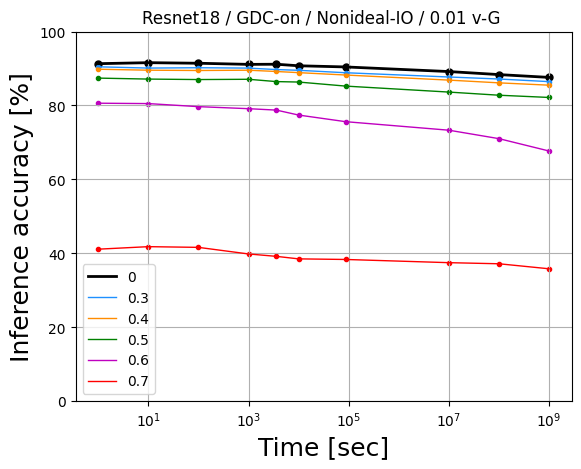

In [47]:
import matplotlib.pyplot as plt

x = df_pivot_001['inf_time']

plt.grid(True)

plt.plot(x,df_pivot_001['-'], label = '0', linewidth=2, color='k')
plt.scatter(x, df_pivot_001['-'], marker='.', s=100, color='k')

plt.plot(x,df_pivot_001[0.3], label = '0.3', linewidth=1, color='dodgerblue')
plt.scatter(x, df_pivot_001[0.3], marker='.',  color='dodgerblue')

plt.plot(x,df_pivot_001[0.4], label = '0.4', linewidth=1, color='darkorange')
plt.scatter(x, df_pivot_001[0.4], marker='.',  color='darkorange')

plt.plot(x,df_pivot_001[0.5], label = '0.5', linewidth=1, color='g')
plt.scatter(x, df_pivot_001[0.5], marker='.',  color='g')

plt.plot(x,df_pivot_001[0.6], label = '0.6', linewidth=1, color='m')
plt.scatter(x, df_pivot_001[0.6], marker='.',  color='m')

plt.plot(x,df_pivot_001[0.7], label = '0.7', linewidth=1, color='r')
plt.scatter(x, df_pivot_001[0.7], marker='.', color='r')

plt.title("Resnet18 / GDC-on / Nonideal-IO / 0.01 v-G ")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
# plt.xlim(1,100000000)
plt.xscale('log')
plt.show()

In [47]:
df_r_pivot_001 = df_res_001.pivot_table(index=pivot_index, columns='pruning', values='accuracy', aggfunc='mean')
df_r_pivot_001.reset_index(inplace=True) # index to columns

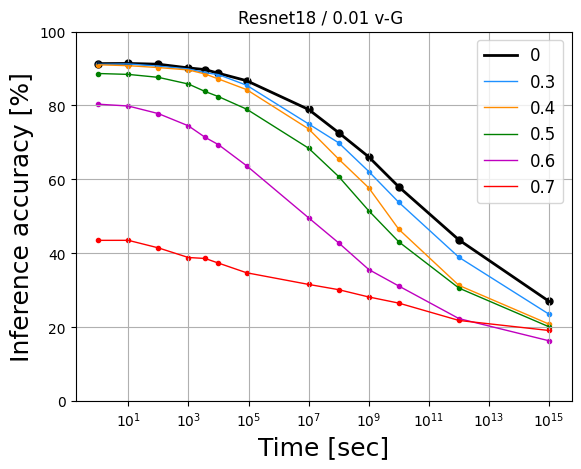

In [48]:
x = df_r_pivot_001['inf_time']

plt.grid(True)

plt.plot(x,df_r_pivot_001['-'], label = '0', linewidth=2, color='k')
plt.scatter(x, df_r_pivot_001['-'], marker='.', s=100, color='k')

plt.plot(x,df_r_pivot_001[0.3], label = '0.3', linewidth=1, color='dodgerblue')
plt.scatter(x, df_r_pivot_001[0.3], marker='.',  color='dodgerblue')

plt.plot(x,df_r_pivot_001[0.4], label = '0.4', linewidth=1, color='darkorange')
plt.scatter(x, df_r_pivot_001[0.4], marker='.',  color='darkorange')

plt.plot(x,df_r_pivot_001[0.5], label = '0.5', linewidth=1, color='g')
plt.scatter(x, df_r_pivot_001[0.5], marker='.',  color='g')

plt.plot(x,df_r_pivot_001[0.6], label = '0.6', linewidth=1, color='m')
plt.scatter(x, df_r_pivot_001[0.6], marker='.',  color='m')

plt.plot(x,df_r_pivot_001[0.7], label = '0.7', linewidth=1, color='r')
plt.scatter(x, df_r_pivot_001[0.7], marker='.', color='r')

plt.title("Resnet18 / 0.01 v-G ")
plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
# plt.xlim(1,100000000)
plt.xscale('log')